<h1>Movies Popularity Prediction</h1>
    
    - Part 1: Exploring data
    - Part 2: Preprocessing
    - Part 3: Neural Network
    - Part 4: SVM
    - Part 5: Random Forest
    - Part 6: Conclusion

<h2> Part 1: Exploring dara <h2>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from statistics import mean , stdev
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(0)

import seaborn as sns
sns.set()

movies = pd.read_csv('./dataset/tmdb_5000_movies.csv')
credits = pd.read_csv('./dataset/tmdb_5000_credits.csv')

Let's take a look at the data

In [2]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


We notice that the columns 'genres', 'keywords', 'production_companies', 'production_countries' and 'spoken_languages' are of the dictionary type (they have nominal values). 

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Also the credits dataset inclueds only attribute with nominal values.
Do the two dataset contain information for the same films? Let's check it.

In [4]:
(credits['title']==movies['title']).describe()

count     4803
unique       1
top       True
freq      4803
Name: title, dtype: object

This tells us that every row in the credits data base has the same movie title as the same row in the movies data base.

<h3> Numerical analysis </h3>

In [5]:
num_list = ['budget','popularity','revenue','runtime','vote_average','vote_count']
movies_num = movies[num_list]
movies_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


In [6]:
movies_num.describe().round()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.0,4803.0,4.803000e+03,4801.0,4803.0,4803.0
mean,29045040.0,21.0,8.226064e+07,107.0,6.0,690.0
std,40722391.0,32.0,1.628571e+08,23.0,1.0,1235.0
min,0.0,0.0,0.000000e+00,0.0,0.0,0.0
25%,790000.0,5.0,0.000000e+00,94.0,6.0,54.0
50%,15000000.0,13.0,1.917000e+07,103.0,6.0,235.0
75%,40000000.0,28.0,9.291719e+07,118.0,7.0,737.0
max,380000000.0,876.0,2.787965e+09,338.0,10.0,13752.0


Runtime includes some NaN value. We should solve this to work with data.

In [7]:
my_imputer = SimpleImputer()
X2 = my_imputer.fit_transform(movies[['runtime']])
movies_num['runtime'] = X2
movies_num.describe().round()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.0,4803.0,4.803000e+03,4803.0,4803.0,4803.0
mean,29045040.0,21.0,8.226064e+07,107.0,6.0,690.0
std,40722391.0,32.0,1.628571e+08,23.0,1.0,1235.0
min,0.0,0.0,0.000000e+00,0.0,0.0,0.0
25%,790000.0,5.0,0.000000e+00,94.0,6.0,54.0
50%,15000000.0,13.0,1.917000e+07,103.0,6.0,235.0
75%,40000000.0,28.0,9.291719e+07,118.0,7.0,737.0
max,380000000.0,876.0,2.787965e+09,338.0,10.0,13752.0


The movies dataset contains also some meaningless feature as "id". We can remove it.

/home/emanuele/anaconda3/envs/IMDBPopularityPrediction/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9371439f28>,
      dtype=object)

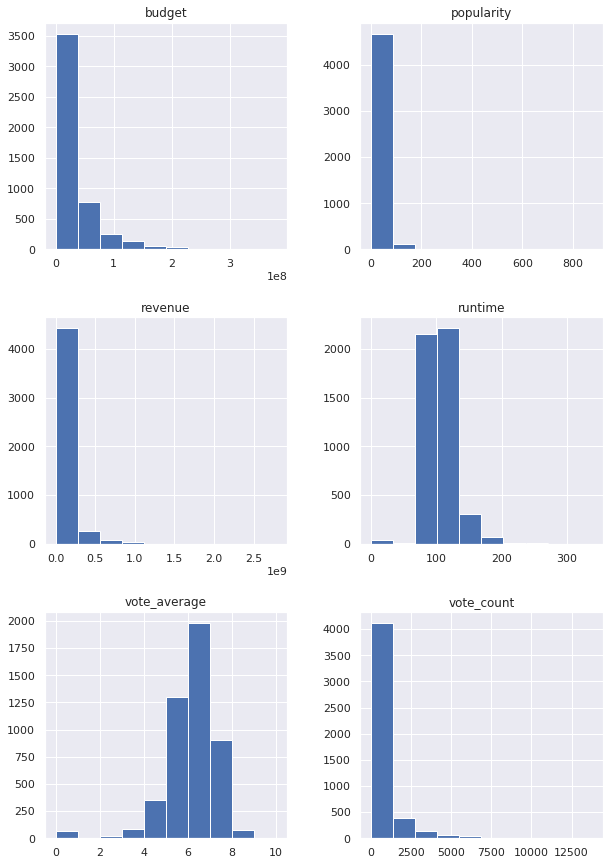

In [8]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
movies_num.hist(ax = ax)

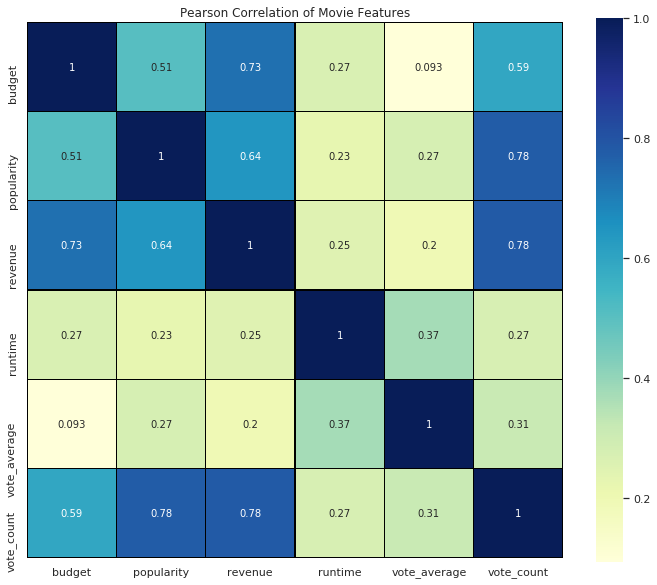

In [9]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation of Movie Features')
sns.heatmap(movies_num.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

<h3>Analyze genres: <h3>

In [10]:
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])

credits = load_tmdb_credits("dataset/tmdb_5000_credits.csv")
movies = load_tmdb_movies("dataset/tmdb_5000_movies.csv")

del credits['title']
df = pd.concat([movies, credits], axis=1)

df['genres'] = df['genres'].apply(pipe_flatten_names)

liste_genres = set()
for s in df['genres'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)
liste_genres.remove('')

df_reduced = df[['title','vote_average','release_date','runtime','budget','revenue']].reset_index(drop=True)

for genre in liste_genres:
    df_reduced[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)
df_reduced[:5]

df_reduced.head()

,title,vote_average,release_date,runtime,budget,revenue,Adventure,Mystery,Family,Foreign,...,Fantasy,Western,Drama,Comedy,Thriller,Music,Documentary,War,Science Fiction,History
0,Avatar,7.2,2009-12-10,162.0,237000000,2787965087,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,Pirates of the Caribbean: At World's End,6.9,2007-05-19,169.0,300000000,961000000,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Spectre,6.3,2015-10-26,148.0,245000000,880674609,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,7.6,2012-07-16,165.0,250000000,1084939099,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,John Carter,6.1,2012-03-07,132.0,260000000,284139100,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


We get an easy to work dataframe for the movie generes. Lets look at the distribution of the genres. 

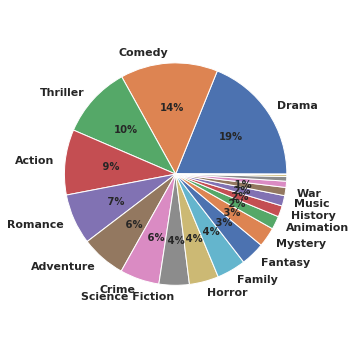

In [11]:
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5,5))
genre_count = []
for genre in liste_genres:
    genre_count.append([genre, df_reduced[genre].values.sum()])
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
      autopct = lambda x:'{:2.0f}%'.format(x) if x>1 else '',
      shadow = False, startangle=0)
ax.axis('equal')
plt.tight_layout()

We note that the number of different values of the 'genres' feature is quite small. Then we could use this features as a categorical feature. We could apply a 1 to n mapping.

<h2>  </h2>

Here we define some usefull function to preprocess the data.
We start with the root mean square error score.

<h2> Preprocessing </h2>

In the first step, we define the mean square error score. Then, we start with some preprocessing of the data to include feature of type dictionary. For example, we have implemented some function to convert and include information about the production countries, the production companies, the cast, the crew and the genres information for each movie.

In [12]:
from sklearn.cluster import KMeans

def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    df['genres'] = df['genres'].apply(pipe_flatten_names)
    return df


def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def pipe_flatten_names(keywords):
    keys = [x['name'] for x in keywords]
    return '|'.join([x['name'] for x in keywords])

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def includeProductionCountries(movies):
    array = []
    for index, row in movies.iterrows():
        if len(row['production_countries']) != 0:
            h = row['production_countries'][0]['iso_3166_1']
            movies.at[index, 'production_countries'] = h
            if h not in array:
                array.append(h)

    for c in array:
        movies[c] = movies['production_countries'].str.contains(c).apply(lambda x: 1 if x else 0)

    return movies

def convertGenres(movies):
    # movies['genres'] = movies['genres'].apply(pipe_flatten_names)

    liste_genres = set()
    for s in movies['genres'].str.split('|'):
        liste_genres = set().union(s, liste_genres)
    liste_genres = list(liste_genres)
    liste_genres.remove('')

    for genre in liste_genres:
        movies[genre] = movies['genres'].str.contains(genre).apply(lambda x: 1 if x else 0)

    return movies


def castClustering(meta, movies):
    meta = meta.drop(['genres', 'budget'], axis=1)

    directorDict = dict()
    actorsDict = dict()
    for index, row in meta.iterrows():
        directorDict[row['director_name']] = row['director_facebook_likes']
        actorsDict[row['actor_1_name']] = [row['actor_1_facebook_likes'], 0, 0]
        actorsDict[row['actor_2_name']] = [row['actor_2_facebook_likes'], 0, 0]
        actorsDict[row['actor_2_name']] = [row['actor_3_facebook_likes'], 0, 0]

    keys = actorsDict.keys()
    for index, row in movies.iterrows():
        actors = [x['name'] for x in row['cast']]
        for actor in actors:
            if actor in keys:
                actorsDict[actor][1] += row['popularity']
                actorsDict[actor][2] += 1

    df = pd.DataFrame.from_dict(actorsDict, orient='index')
    df.columns = ['facebook_likes', 'popularity', 'movies_number']
    df = df.fillna(0)

    df_min = df.min()
    df_max = df.max()
    df -= df_min
    df /= df_max

    # Convert DataFrame to matrix
    mat = df.values
    # Using sklearn
    km = sklearn.cluster.KMeans(n_clusters=3)
    km.fit(mat)
    # Get cluster assignment labels
    labels = km.labels_
    # Format results as a DataFrame
    results = pd.DataFrame([df.index, labels]).T
    results.columns = ['actor', 'cluster']

    cluster_0 = results.loc[results['cluster'] == 0]['actor'].values
    cluster_1 = results.loc[results['cluster'] == 1]['actor'].values
    cluster_2 = results.loc[results['cluster'] == 2]['actor'].values

    movies['actor_0'] = 0
    movies['actor_1'] = 0
    movies['actor_2'] = 0

    for index, row in movies.iterrows():
        actors = [x['name'] for x in row['cast']]
        for actor in actors:
            if actor in cluster_0:
                movies.at[index, 'actor_0'] = 1
                continue
            if actor in cluster_1:
                movies.at[index, 'actor_1'] = 1
                continue
            if actor in cluster_2:
                movies.at[index, 'actor_2'] = 1

    return movies

def includeProductionCountries(movies):
    array = []
    for index, row in movies.iterrows():
        if len(row['production_countries']) != 0:
            h = row['production_countries'][0]['iso_3166_1']
            movies.at[index, 'production_countries'] = h
            if h not in array:
                array.append(h)

    for c in array:
        movies[c] = movies['production_countries'].str.contains(c).apply(lambda x: 1 if x else 0)

    return movies

def includeProductionCompanies(movies):
    companiesList = dict()
    for index, row in movies.iterrows():
        companies = row['production_companies']
        # companiesJson = json.loads(companies)
        for c in companies:
            if c['name'] in companiesList.keys():
                companiesList[c['name']][0] += row['popularity']
                companiesList[c['name']][1] += 1
            else:
                companiesList[c['name']] = [row['popularity'], 1]

    # Compute mean
    for e in companiesList.keys():
        companiesList[e] = companiesList[e][0] / companiesList[e][1]

    movies['companies_popularity'] = 0
    for index, row in movies.iterrows():
        companies = row['production_companies']
        # companiesJson = json.loads(companies)
        names = [c['name'] for c in companies]
        for company in names:
            if companiesList[company] > movies.at[index, 'companies_popularity']:
                movies.at[index, 'companies_popularity'] = companiesList[company]

    # print(movies['companies_popularity'].describe())
    # movies.to_csv('./dataset/movies_companies.csv', index=False)
    return movies

def insertCast(movies, meta):
    meta = meta.drop(['genres', 'budget'], axis=1)
    meta['movie_title'] = meta['movie_title'].apply(lambda x: x.strip())
    movies['title'] = movies['title'].apply(lambda x: x.strip())

    meta = meta[['movie_title', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',
                 'director_facebook_likes', 'movie_facebook_likes', 'cast_total_facebook_likes']]
    movies = pd.merge(movies, meta.drop_duplicates(subset=['movie_title']), how='left', left_on=['title'],
                      right_on=['movie_title'])

    movies = movies.drop(['movie_title'], axis=1)

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies[['actor_1_facebook_likes']])
    movies['actor_1_facebook_likes'] = X2

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies[['actor_2_facebook_likes']])
    movies['actor_2_facebook_likes'] = X2

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies[['actor_3_facebook_likes']])
    movies['actor_3_facebook_likes'] = X2

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies[['director_facebook_likes']])
    movies['director_facebook_likes'] = X2

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies[['movie_facebook_likes']])
    movies['movie_facebook_likes'] = X2

    my_imputer = SimpleImputer()
    X2 = my_imputer.fit_transform(movies[['cast_total_facebook_likes']])
    movies['cast_total_facebook_likes'] = X2

    return movies

def preProcess(movies, meta, credits):
    #movies = convertGenres(movies)
    # movies = convertRuntime(movies)
    movies = includeProductionCompanies(movies)
    # movies = includeProductionCountries(movies)
    movies = pd.concat([movies, credits], axis=1)
    movies = castClustering(meta, movies)
    del movies['cast']
    del movies['crew']
    #movies = insertCast(movies)
    return movies

<h2> Part 2: Neural Network <h2>

We start with some preprocessing. As first step, we consider just numerical attributes. Then, we start adding more information (i.e., including genres, production companies, actors, cast...)

In [13]:
credits = pd.read_csv("dataset/tmdb_5000_credits.csv")
movies = pd.read_csv("dataset/tmdb_5000_movies.csv")

# Remove all nominal features
movies = movies.drop(
    ["genres", "homepage", "id", "keywords", "original_language", "original_title", "overview", "production_companies",
     "production_countries", "spoken_languages", "status", "tagline", "title", "release_date"], axis=1)

# Solve NaN
y_imputer = SimpleImputer()
X2 = my_imputer.fit_transform(movies[['runtime']])
movies['runtime'] = X2


# Get popularity values (the target one) and remove them from the dataset
y = movies["popularity"]
movies = movies.drop(["popularity"], axis=1)

# Select test and trainign set through a random distribution
x_train, x_test, y_train, y_test = train_test_split(
    movies, y, test_size=0.30, random_state=1234)

# Normalize data to force them in fixed range
# Scale train and test set between 0 and 1 using the max and min values for each attribute the values for each
# attribute are retrieved form the training set and these values will be used on the test set too (e.g. we do not use
#  the max and min value that the attributes of the test set will have, but we will use the ones from the training)
xmins = x_train.min()
xmaxs = x_train.max()
ymins = y_train.min()
ymaxs = y_train.max()

x_train -= xmins
x_train /= xmaxs

x_test -= xmins
x_test /= xmaxs

y_train -= ymins
y_train /= ymaxs

y_test -= ymins
y_test /= ymaxs

We try different configuration for the NN, choosing the best one.

In [14]:
import tensorflow as tf
tf.set_random_seed(12345)

best_mse = 100
best_mae = 100
best_nodes = 1

# Train using 3 neurons in the hidden layer
for num_nodes in range(2, 10):

    MLP = tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='sigmoid', input_shape=(movies.shape[1],)),
        #tf.keras.layers.Dense(3, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='linear')
    ])

    MLP.compile(optimizer="adadelta", loss="mse", metrics=['mae'])
    MLP.fit(x_train, y_train, epochs=10)

    mse, mae = MLP.evaluate(x_test, y_test)
    print("Error on the test set for " + str(num_nodes) + " nodes is: ", [mse, mae])

    if mse < best_mse:
        best_nodes = num_nodes
        best_mae = mae
        best_mse = mse
        best_model = MLP

print("The best loss is for " + str(best_nodes) + " nodes with MSE: " + str(best_mse) + ", MAE: " + str(best_mae))

Epoch 1/10
3362/3362 [==============================] - 0s 49us/step - loss: 0.6967 - mean_absolute_error: 0.8268
Epoch 2/10
3362/3362 [==============================] - 0s 18us/step - loss: 0.2677 - mean_absolute_error: 0.5114
Epoch 3/10
3362/3362 [==============================] - 0s 17us/step - loss: 0.0899 - mean_absolute_error: 0.2932
Epoch 4/10
3362/3362 [==============================] - 0s 17us/step - loss: 0.0214 - mean_absolute_error: 0.1363
Epoch 5/10
3362/3362 [==============================] - 0s 17us/step - loss: 0.0036 - mean_absolute_error: 0.0455
Epoch 6/10
3362/3362 [==============================] - 0s 16us/step - loss: 0.0020 - mean_absolute_error: 0.0264
Epoch 7/10
3362/3362 [==============================] - 0s 16us/step - loss: 0.0018 - mean_absolute_error: 0.0246
Epoch 8/10
3362/3362 [==============================] - 0s 16us/step - loss: 0.0016 - mean_absolute_error: 0.0228
Epoch 9/10
3362/3362 [==============================] - 0s 17us/step - loss: 0.0015 - me

Epoch 5/10
3362/3362 [==============================] - 0s 18us/step - loss: 0.0041 - mean_absolute_error: 0.0388
Epoch 6/10
3362/3362 [==============================] - 0s 18us/step - loss: 0.0031 - mean_absolute_error: 0.0334
Epoch 7/10
3362/3362 [==============================] - 0s 19us/step - loss: 0.0025 - mean_absolute_error: 0.0288
Epoch 8/10
3362/3362 [==============================] - 0s 18us/step - loss: 0.0020 - mean_absolute_error: 0.0250
Epoch 9/10
3362/3362 [==============================] - 0s 19us/step - loss: 0.0017 - mean_absolute_error: 0.0221
Epoch 10/10
1441/1441 [==============================] - 0s 62us/step
Error on the test set for 8 nodes is:  [0.0007830696690850309, 0.017731096916092013]
Epoch 1/10
3362/3362 [==============================] - 0s 86us/step - loss: 0.0555 - mean_absolute_error: 0.1932
Epoch 2/10
3362/3362 [==============================] - 0s 18us/step - loss: 0.0012 - mean_absolute_error: 0.0193
Epoch 3/10
3362/3362 [=========================

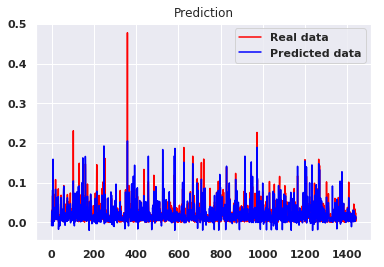

In [15]:
y_pred = best_model.predict(x_test)

plt.plot(np.arange(len(y_test)), y_test, color='red', label = 'Real data')
plt.plot(np.arange(len(y_test)), y_pred, color='blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()
plt.close()

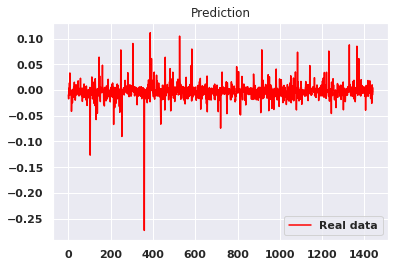

In [16]:
y_pred = np.concatenate(y_pred, axis=0)
plt.plot(np.arange(len(y_test)), y_pred - y_test.values, color='red', label='Real data')
plt.title('Prediction')
plt.legend()
plt.show()

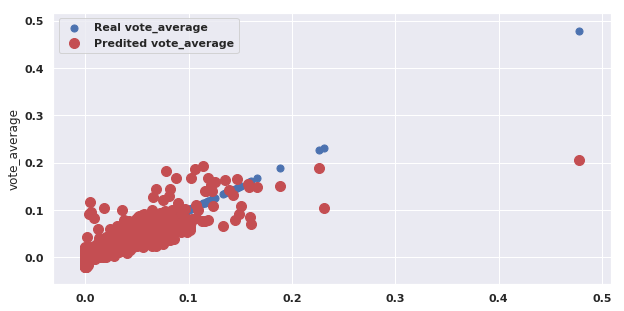

In [17]:
f = plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test, s=50,label="Real vote_average");
plt.scatter(y_test, y_pred,s=100, c='r',label="Predited vote_average");
plt.ylabel("vote_average");
plt.legend(loc=2);

In [18]:
print("Root mean squared error: %.6f"
      % rmse(y_test, y_pred))
print("Mean absolute error: %.6f"
      % mean_absolute_error(y_test, y_pred))

Root mean squared error: 0.016574
Mean absolute error: 0.009054


The resulting prediction in pretty accurate. We verified that the 'vote_count' feature is high correlated with the popularity. Including other features do not add any information. Testing the model with information by the cast, the crew, or the production companies do not change significantly the prediction.
We will try to discard the features not available in a real prediction  scenario as the 'vote_count', 'vote_mean' and 'revenue' attributes. We include information from the movie_dataset dataset to extrapolate information about actors. In particular, it includes data by facebook for each actor and director that appears in a movie.

In [19]:
credits = load_tmdb_credits("dataset/tmdb_5000_credits.csv")
movies = load_tmdb_movies("dataset/tmdb_5000_movies.csv")
meta = pd.read_csv("dataset/movie_metadata.csv")
movies = preProcess(movies, meta, credits)


# # Remove all nominal features
movies = movies.drop(["genres", "homepage", "id", "keywords", "original_language", "original_title", "overview",
                      "production_companies", "production_countries", "spoken_languages", "status", "tagline",
                      "title",
                      "release_date", 'revenue', 'vote_average', 'vote_count'], axis=1)

# Solve NaN
y_imputer = SimpleImputer()
X2 = my_imputer.fit_transform(movies[['runtime']])
movies['runtime'] = X2

# Get popularity values (the target one) and remove them from the dataset
y = movies["popularity"]
movies = movies.drop(["popularity"], axis=1)

# Select test and trainign set through a random distribution
x_train, x_test, y_train, y_test = train_test_split(
    movies, y, test_size=0.30, random_state=1234)

# Normalize data to force them in fixed range
# Scale train and test set between 0 and 1 using the max and min values for each attribute the values for each
# attribute are retrieved form the training set and these values will be used on the test set too (e.g. we do not use
#  the max and min value that the attributes of the test set will have, but we will use the ones from the training)
xmins = x_train.min()
xmaxs = x_train.max()
ymins = y_train.min()
ymaxs = y_train.max()

x_train -= xmins
x_train /= xmaxs

x_test -= xmins
x_test /= xmaxs

y_train -= ymins
y_train /= ymaxs

y_test -= ymins
y_test /= ymaxs

best_mse = 100
best_mae = 100
best_nodes = 1

# Train using 3 neurons in the hidden layer
for num_nodes in range(2, 10):

    MLP = tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='sigmoid', input_shape=(movies.shape[1],)),
        #tf.keras.layers.Dense(3, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='linear')
    ])

    MLP.compile(optimizer="adadelta", loss="mse", metrics=['mae'])
    MLP.fit(x_train, y_train, epochs=10)

    mse, mae = MLP.evaluate(x_test, y_test)
    print("Error on the test set for " + str(num_nodes) + " nodes is: ", [mse, mae])

    if mse < best_mse:
        best_nodes = num_nodes
        best_mae = mae
        best_mse = mse
        best_model = MLP

print("The best loss is for " + str(best_nodes) + " nodes with MSE: " + str(best_mse) + ", MAE: " + str(best_mae))

NameError: name 'sklearn' is not defined

In [ ]:
y_pred = best_model.predict(x_test)
plt.plot(np.arange(len(y_test)), y_test, color='red', label = 'Real data')
plt.plot(np.arange(len(y_test)), y_pred, color='blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()
plt.close()

In [ ]:
y_pred = np.concatenate(y_pred, axis=0)
plt.plot(np.arange(len(y_test)), y_pred - y_test.values, color='red', label='Real data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
f = plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test, s=50,label="Real vote_average");
plt.scatter(y_test, y_pred,s=100, c='r',label="Predited vote_average");
plt.ylabel("vote_average");
plt.legend(loc=2);

In [ ]:
print("Root mean squared error: %.6f"
      % rmse(y_test, y_pred))
print("Mean absolute error: %.6f"
      % mean_absolute_error(y_test, y_pred))

<h2> SVM <h2>